In [2]:
import pandas as pd

In [52]:
df = pd.read_csv("forestfires.csv")


In [27]:
df.columns

Index(['X', 'Y', 'month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH',
       'wind', 'rain', 'area'],
      dtype='object')

In [53]:
import plotly.express as px


fig = px.bar(x=fire["temp"], y=fire["month"])
fig.show()

In [16]:
import plotly.express as px


fig = px.bar(x=fire["temp"], y=fire["day"])
fig.show()

In [40]:
fig = px.histogram(df, x= ["wind","temp"],  barmode="overlay")
fig.show()

In [58]:
import plotly.express as px

fig = px.area(df, x="temp", y="wind", color="day")
fig.show()

In [73]:
fig = px.scatter(df, x="month", y="temp", color="temp")
fig.show()

In [78]:
fig = px.area(df, x="rain", y="day", color="day", line_group="temp")
fig.show()

In [99]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score


# Had to add another read line for some reason it wouldn't work without me putting it here again
data = pd.read_csv("forestfires.csv")

# Convert month names to month numbers
month_map = {
    'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4, 'may': 5, 'jun': 6,
    'jul': 7, 'aug': 8, 'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12
}
data['month'] = data['month'].map(month_map)

# Convert day names to day numbers
day_map = {
    'mon': 1, 'tue': 2, 'wed': 3, 'thu': 4, 'fri': 5, 'sat': 6, 'sun': 7
}
data['day'] = data['day'].map(day_map)

# Prepare the data for regression
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Train a random forest regression model
model = RandomForestRegressor(n_estimators=100, random_state=0)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model using R-squared
score = r2_score(y_test, y_pred)
print("R-squared:", score)


R-squared: -0.11621634563060179


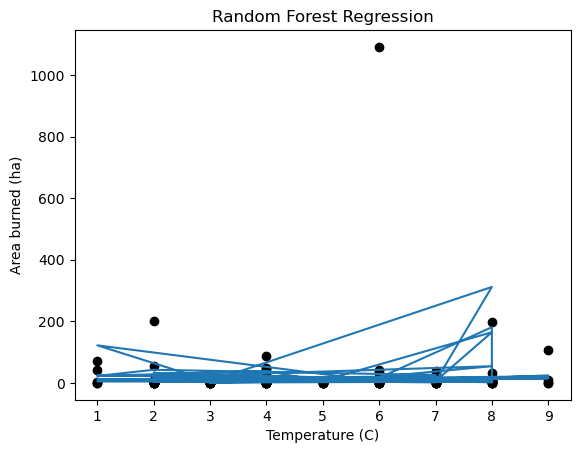

In [88]:
import matplotlib.pyplot as plt

# Plot the results
plt.scatter(X_test[:, 0], y_test, color='black')
plt.plot(X_test[:, 0], y_pred)

plt.title("Random Forest Regression")
plt.xlabel("Temperature (C)")
plt.ylabel("Area burned (ha)")
plt.show()


In [79]:

monthly_data = data.groupby('month')['temp'].mean()

grpd_df = pd.DataFrame(monthly_data)
grpd_df 

,temp
month,
1,5.250000
2,9.635000
3,13.083333
4,12.044444
5,14.650000
6,20.494118
7,22.109375
8,21.631522
9,19.612209


In [93]:

# Group by month and calculate the mean for each column
monthly_stats = df.groupby('day')['temp'].mean()

group = pd.DataFrame(monthly_stats)
group

,temp
day,
fri,17.948235
mon,16.951351
sat,19.348810
sun,19.065263
thu,19.704918
tue,19.439062
wed,20.427778
